# **Question 1: K-Nearest Neighbors (KNN)**

20% Test Data Results (10 samples):
Index  Brightness   Saturation   Hue    Contrast   True Label   Manual Pred  Scikit-learn Pred 
------------------------------------------------------------------------------------------
13     75           16           148    25         Red          Blue         Blue              
39     20           77           160    69         Blue         Red          Red               
30     3            76           231    26         Red          Blue         Blue              
45     11           16           212    75         Blue         Blue         Blue              
17     67           55           145    43         Red          Blue         Blue              
48     90           23           274    47         Red          Red          Red               
26     94           57           290    35         Red          Red          Red               
25     87           39           154    71         Red          Red          Red               
32     97

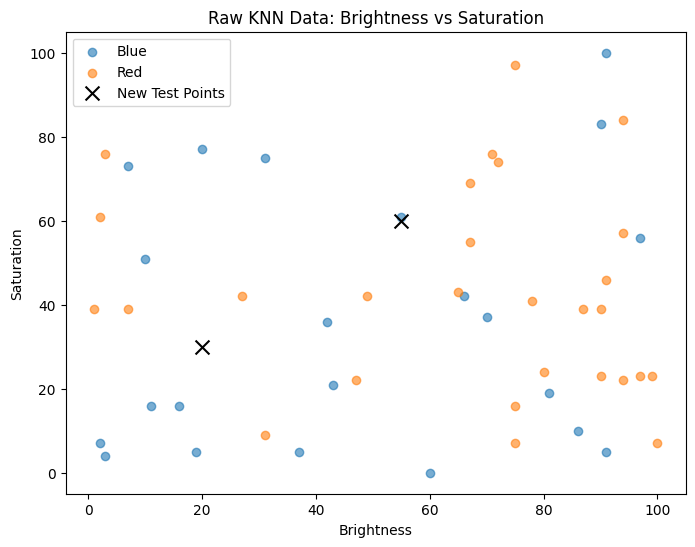

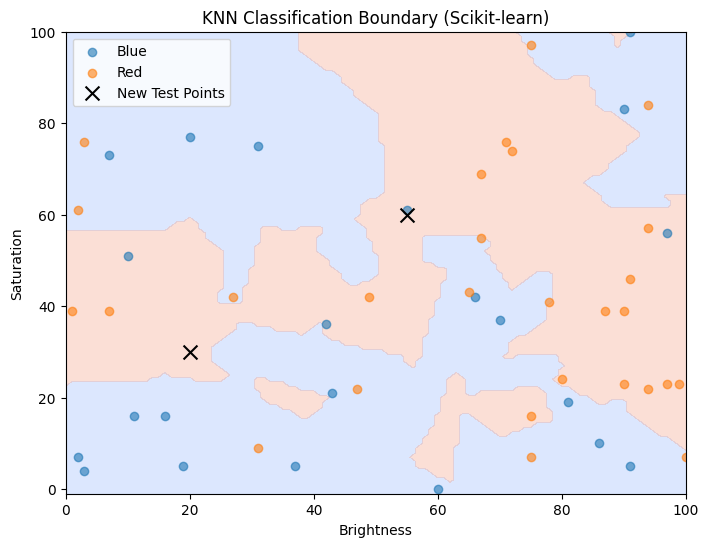

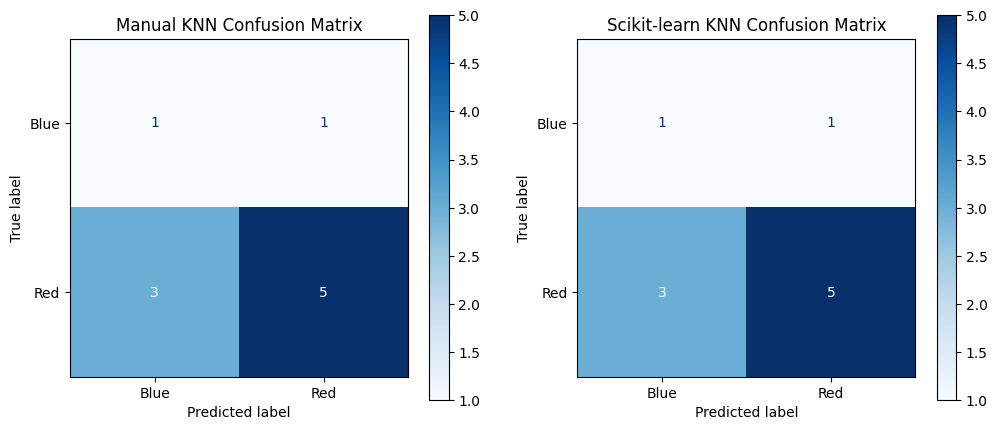

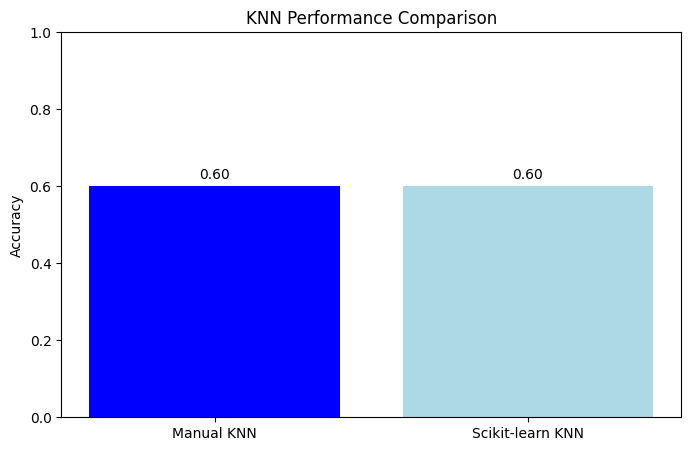

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load KNN dataset
knn_data = pd.read_csv('knn_dataset.csv')
X_knn = knn_data[['Brightness', 'Saturation', 'Hue', 'Contrast']].values
y_knn = knn_data['Class'].values

# Split data into 80% training and 20% testing, preserving indices
train_indices, test_indices = train_test_split(range(len(knn_data)), test_size=0.2, random_state=42)
X_train_knn = X_knn[train_indices]
X_test_knn = X_knn[test_indices]
y_train_knn = y_knn[train_indices]
y_test_knn = y_knn[test_indices]

# Store the full test data with all attributes
test_data_full = knn_data.iloc[test_indices].copy()

# Manual KNN
def euclidean_distance(x1, x2):
    return np.sqrt((x2[0] - x1[0])**2 + (x2[1] - x1[1])**2 + (x2[2] - x1[2])**2 + (x2[3] - x1[3])**2)

def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for x_test in X_test:
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    return np.array(y_pred)

# Predict on test set (manual)
y_pred_knn_scratch = knn_predict(X_train_knn, y_train_knn, X_test_knn, k=3)
knn_scratch_accuracy = accuracy_score(y_test_knn, y_pred_knn_scratch)

# Scikit-learn KNN
knn_sk = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_sk.fit(X_train_knn, y_train_knn)
y_pred_knn_sk = knn_sk.predict(X_test_knn)
knn_sk_accuracy = accuracy_score(y_test_knn, y_pred_knn_sk)

# New test data points
new_knn_test = np.array([
    [55, 60, 175, 45],  # Test Point 1
    [20, 30, 130, 20]   # Test Point 2
])

# Predict new test points
knn_scratch_new_pred = knn_predict(X_train_knn, y_train_knn, new_knn_test, k=3)
knn_sk_new_pred = knn_sk.predict(new_knn_test)

# Display 20% Test Data Results with All Attributes
print("20% Test Data Results (10 samples):")
print(f"{'Index':<6} {'Brightness':<12} {'Saturation':<12} {'Hue':<6} {'Contrast':<10} {'True Label':<12} {'Manual Pred':<12} {'Scikit-learn Pred':<18}")
print("-" * 90)
for i, idx in enumerate(test_indices):
    row = test_data_full.iloc[i]
    print(f"{idx:<6} {row['Brightness']:<12} {row['Saturation']:<12} {row['Hue']:<6} {row['Contrast']:<10} {y_test_knn[i]:<12} {y_pred_knn_scratch[i]:<12} {y_pred_knn_sk[i]:<18}")

# Display new test data predictions
print("\nNew Test Data Predictions:")
print(f"Manual KNN - Test Point 1 [55, 60, 175, 45]: {knn_scratch_new_pred[0]}")
print(f"Manual KNN - Test Point 2 [20, 30, 130, 20]: {knn_scratch_new_pred[1]}")
print(f"Scikit-learn KNN - Test Point 1 [55, 60, 175, 45]: {knn_sk_new_pred[0]}")
print(f"Scikit-learn KNN - Test Point 2 [20, 30, 130, 20]: {knn_sk_new_pred[1]}")

# 1. Raw Data Visualization (Brightness vs Saturation)
plt.figure(figsize=(8, 6))
for label in np.unique(y_knn):
    plt.scatter(X_knn[y_knn == label, 0], X_knn[y_knn == label, 1], label=label, alpha=0.6)
plt.scatter(new_knn_test[:, 0], new_knn_test[:, 1], c='black', marker='x', label='New Test Points', s=100)
plt.xlabel('Brightness')
plt.ylabel('Saturation')
plt.title('Raw KNN Data: Brightness vs Saturation')
plt.legend()
plt.show()

# 2. Classification Boundary (using only Brightness and Saturation for 2D visualization)
X_knn_2d = X_knn[:, :2]  # Use only Brightness and Saturation
X_train_2d = X_knn_2d[train_indices]
X_test_2d = X_knn_2d[test_indices]
y_train_2d = y_knn[train_indices]
y_test_2d = y_knn[test_indices]

# Encode labels to numeric values for contour plot
le = LabelEncoder()
y_knn_numeric = le.fit_transform(y_knn)  # 'Red' -> 0, 'Blue' -> 1
y_train_2d_numeric = le.transform(y_train_2d)
y_test_2d_numeric = le.transform(y_test_2d)

# Train on 2D data with numeric labels
knn_sk_2d = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_sk_2d.fit(X_train_2d, y_train_2d_numeric)

# Create mesh grid for boundary
h = 1  # Step size
x_min, x_max = X_knn_2d[:, 0].min() - 1, X_knn_2d[:, 0].max() + 1
y_min, y_max = X_knn_2d[:, 1].min() - 1, X_knn_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_sk_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot classification boundary with new test points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=[-0.5, 0.5, 1.5])
for label in np.unique(y_knn):
    plt.scatter(X_knn_2d[y_knn == label, 0], X_knn_2d[y_knn == label, 1], label=label, alpha=0.6)
plt.scatter(new_knn_test[:, 0], new_knn_test[:, 1], c='black', marker='x', label='New Test Points', s=100)
plt.xlabel('Brightness')
plt.ylabel('Saturation')
plt.title('KNN Classification Boundary (Scikit-learn)')
plt.legend()
plt.show()

# 3. Confusion Matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test_knn, y_pred_knn_scratch, ax=ax1, cmap='Blues')
ax1.set_title('Manual KNN Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test_knn, y_pred_knn_sk, ax=ax2, cmap='Blues')
ax2.set_title('Scikit-learn KNN Confusion Matrix')
plt.show()

# 4. Accuracy Comparison
accuracies_knn = {'Manual KNN': knn_scratch_accuracy, 'Scikit-learn KNN': knn_sk_accuracy}
plt.figure(figsize=(8, 5))
plt.bar(accuracies_knn.keys(), accuracies_knn.values(), color=['blue', 'lightblue'])
plt.ylabel('Accuracy')
plt.title('KNN Performance Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracies_knn.values()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.show()

# **Question 2: Na ̈ıve Bayes Classifier**

20% Test Data Results (10 samples):
Index  Contains_Buy   Contains_Win   Email_Length   Special_Chars  True Label   Manual Pred  Scikit-learn Pred 
----------------------------------------------------------------------------------------------------
13     Yes            No             Short          Few            Spam         Not Spam     Not Spam          
39     No             No             Short          Few            Spam         Not Spam     Not Spam          
30     No             No             Long           Many           Spam         Spam         Spam              
45     Yes            No             Short          Few            Not Spam     Not Spam     Not Spam          
17     Yes            No             Long           Many           Not Spam     Not Spam     Not Spam          
48     Yes            Yes            Long           Many           Not Spam     Not Spam     Not Spam          
26     Yes            No             Long           Many           Spam        

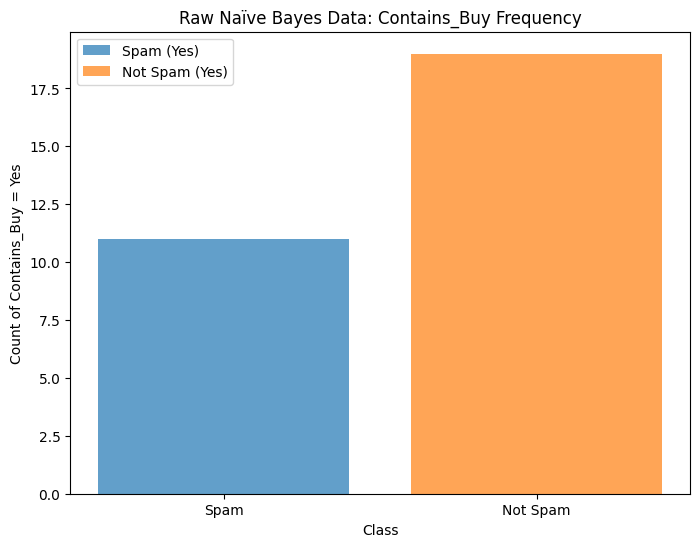

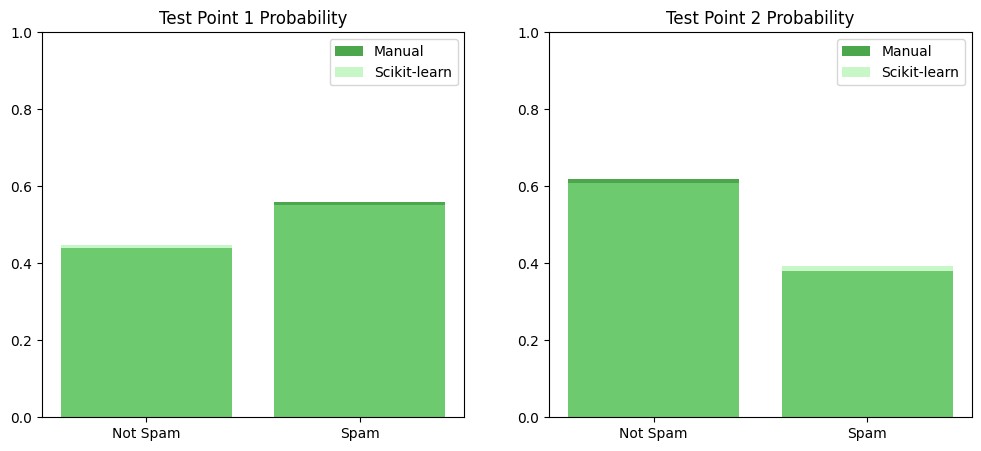

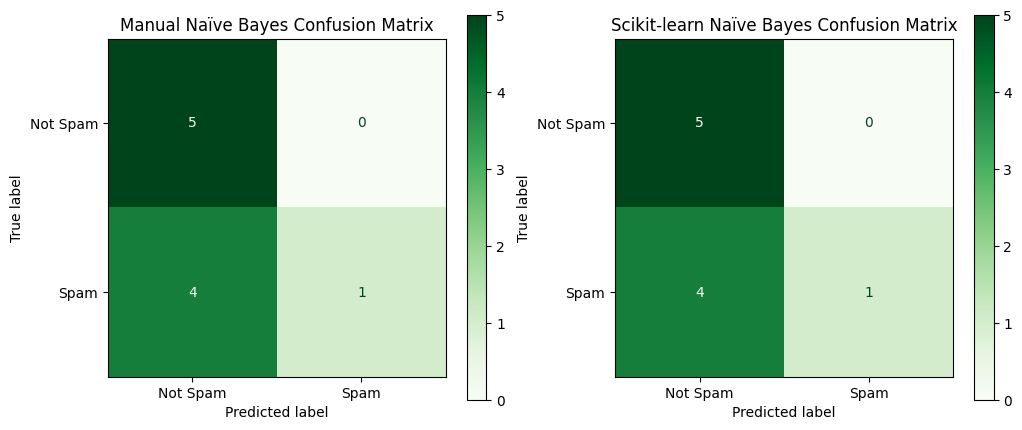

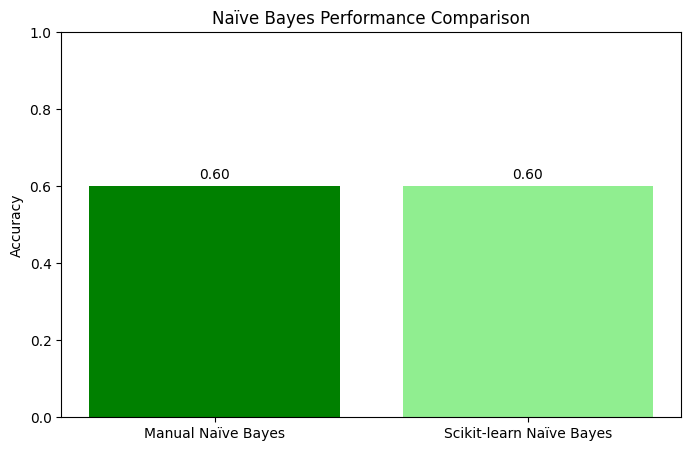

In [ ]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load Naïve Bayes dataset
nb_data = pd.read_csv('nb_dataset.csv')
X_nb_raw = nb_data[['Contains_Buy', 'Contains_Win', 'Email_Length', 'Special_Characters']]
y_nb = nb_data['Class'].values

# Encode categorical features
le = LabelEncoder()
X_nb = X_nb_raw.apply(le.fit_transform)

# Split data into 80% training and 20% testing, preserving indices
train_indices, test_indices = train_test_split(range(len(nb_data)), test_size=0.2, random_state=42)
X_train_nb = X_nb.values[train_indices]
X_test_nb = X_nb.values[test_indices]
y_train_nb = y_nb[train_indices]
y_test_nb = y_nb[test_indices]

# Store the full test data with all attributes
test_data_full = nb_data.iloc[test_indices].copy()

# Manual Naïve Bayes Implementation
def calculate_nb_probabilities(X, y):
    data = pd.DataFrame(X, columns=['Contains_Buy', 'Contains_Win', 'Email_Length', 'Special_Characters'])
    data['Class'] = y
    classes = data['Class'].unique()
    priors = {}
    likelihoods = {}
    for cls in classes:
        cls_data = data[data['Class'] == cls]
        priors[cls] = len(cls_data) / len(data)
        likelihoods[cls] = {}
        for col in data.columns[:-1]:
            likelihoods[cls][col] = cls_data[col].value_counts(normalize=True).to_dict()
    return priors, likelihoods

def nb_predict(priors, likelihoods, X_test):
    y_pred = []
    for x in X_test:
        scores = {}
        for cls in priors:
            score = priors[cls]
            for i, (feature, value) in enumerate(zip(['Contains_Buy', 'Contains_Win', 'Email_Length', 'Special_Characters'], x)):
                score *= likelihoods[cls][feature].get(value, 0.01)  # Laplace smoothing
            scores[cls] = score
        y_pred.append(max(scores, key=scores.get))
    return np.array(y_pred)

# Predict on test set (manual)
priors, likelihoods = calculate_nb_probabilities(X_train_nb, y_train_nb)
y_pred_nb_scratch = nb_predict(priors, likelihoods, X_test_nb)
nb_scratch_accuracy = accuracy_score(y_test_nb, y_pred_nb_scratch)

# Scikit-learn Naïve Bayes
nb_sk = CategoricalNB()
nb_sk.fit(X_train_nb, y_train_nb)
y_pred_nb_sk = nb_sk.predict(X_test_nb)
nb_sk_accuracy = accuracy_score(y_test_nb, y_pred_nb_sk)

# New test data points
new_nb_test_raw = pd.DataFrame([
    {'Contains_Buy': 'Yes', 'Contains_Win': 'No', 'Email_Length': 'Short', 'Special_Characters': 'Many'},  # Test Point 1
    {'Contains_Buy': 'No', 'Contains_Win': 'Yes', 'Email_Length': 'Long', 'Special_Characters': 'Few'}    # Test Point 2
])
new_nb_test = new_nb_test_raw.apply(lambda col: le.fit_transform(col) if col.name in X_nb_raw.columns else col)

# Predict new test points
nb_scratch_new_pred = nb_predict(priors, likelihoods, new_nb_test.values)
nb_sk_new_pred = nb_sk.predict(new_nb_test.values)

# Display 20% Test Data Results with All Attributes
print("20% Test Data Results (10 samples):")
print(f"{'Index':<6} {'Contains_Buy':<14} {'Contains_Win':<14} {'Email_Length':<14} {'Special_Chars':<14} {'True Label':<12} {'Manual Pred':<12} {'Scikit-learn Pred':<18}")
print("-" * 100)
for i, idx in enumerate(test_indices):
    row = test_data_full.iloc[i]
    print(f"{idx:<6} {row['Contains_Buy']:<14} {row['Contains_Win']:<14} {row['Email_Length']:<14} {row['Special_Characters']:<14} {y_test_nb[i]:<12} {y_pred_nb_scratch[i]:<12} {y_pred_nb_sk[i]:<18}")

# Display new test data predictions
print("\nNew Test Data Predictions:")
print(f"Manual Naïve Bayes - Test Point 1 [Yes, No, Short, Many]: {nb_scratch_new_pred[0]}")
print(f"Manual Naïve Bayes - Test Point 2 [No, Yes, Long, Few]: {nb_scratch_new_pred[1]}")
print(f"Scikit-learn Naïve Bayes - Test Point 1 [Yes, No, Short, Many]: {nb_sk_new_pred[0]}")
print(f"Scikit-learn Naïve Bayes - Test Point 2 [No, Yes, Long, Few]: {nb_sk_new_pred[1]}")

# 1. Raw Data Visualization (Contains_Buy frequency by class)
plt.figure(figsize=(8, 6))
for cls in nb_data['Class'].unique():
    subset = nb_data[nb_data['Class'] == cls]
    plt.bar(cls, subset['Contains_Buy'].value_counts().get('Yes', 0), label=f'{cls} (Yes)', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Count of Contains_Buy = Yes')
plt.title('Raw Naïve Bayes Data: Contains_Buy Frequency')
plt.legend()
plt.show()

# 2. Predicted Probabilities for New Test Points
def nb_predict_proba(priors, likelihoods, X_test):
    probs = []
    for x in X_test:
        scores = {}
        total = 0
        for cls in priors:
            score = priors[cls]
            for i, (feature, value) in enumerate(zip(['Contains_Buy', 'Contains_Win', 'Email_Length', 'Special_Characters'], x)):
                score *= likelihoods[cls][feature].get(value, 0.01)
            scores[cls] = score
            total += score
        probs.append([scores['Not Spam'] / total, scores['Spam'] / total])
    return np.array(probs)

probs_scratch = nb_predict_proba(priors, likelihoods, new_nb_test.values)
probs_sk = nb_sk.predict_proba(new_nb_test.values)

# Plot probabilities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for i, ax in enumerate([ax1, ax2]):
    ax.bar(['Not Spam', 'Spam'], probs_scratch[i], alpha=0.7, label='Manual', color='green')
    ax.bar(['Not Spam', 'Spam'], probs_sk[i], alpha=0.5, label='Scikit-learn', color='lightgreen')
    ax.set_title(f'Test Point {i+1} Probability')
    ax.set_ylim(0, 1)
    ax.legend()
plt.show()

# 3. Confusion Matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test_nb, y_pred_nb_scratch, ax=ax1, cmap='Greens')
ax1.set_title('Manual Naïve Bayes Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test_nb, y_pred_nb_sk, ax=ax2, cmap='Greens')
ax2.set_title('Scikit-learn Naïve Bayes Confusion Matrix')
plt.show()

# 4. Accuracy Comparison
accuracies_nb = {'Manual Naïve Bayes': nb_scratch_accuracy, 'Scikit-learn Naïve Bayes': nb_sk_accuracy}
plt.figure(figsize=(8, 5))
plt.bar(accuracies_nb.keys(), accuracies_nb.values(), color=['green', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Naïve Bayes Performance Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracies_nb.values()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.show()